<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/ImageClassifier/digitclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras mnist numpy matplotlib

In [ ]:
#Import
import tensorflow as tf
from tensorflow import keras
import mnist
from keras.models import Sequential as seq
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.layers import MaxPooling2D as mp2d 
from tensorflow.keras import layers
from keras.utils import to_categorical as tc
import numpy as np
import matplotlib.pyplot as pyplot
pyplot.style.use('fivethirtyeight')

In [ ]:
#Upload data
trainX = mnist.train_images()
trainY = mnist.train_labels()
testX = mnist.test_images()
testY = mnist.test_labels()

In [ ]:
#Normalize to 0-1 values
trainX = trainX/255
testX = testX/255
#one-hot encoding 
trainY1h = tc(trainY)
testY1h = tc(testY)
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, -1)
print(trainX.shape)

(60000, 28, 28, 1)


In [ ]:
#create architecture
arch = seq()
#create NN
arch.add(Conv2D(28, (2,2), activation='relu', input_shape=(28,28,1))) #first convolution layer
arch.add(mp2d(pool_size=(2,2))) # first pooling layer
arch.add(Conv2D(28, (2,2), activation='relu')) #second convolution layer
arch.add(mp2d(pool_size=(2,2))) # second pooling layer
arch.add(Flatten()) #flattening layer
arch.add(Dense(1024, activation='relu')) #1024 neuron layer
arch.add(Dropout(0.5)) #first dropout layer
arch.add(Dense(512, activation='relu')) #512 neuron layer
arch.add(Dropout(0.5)) #second dropout layer
arch.add(Dense(256, activation='relu')) #256 neuron layer
arch.add(Dense(10, activation='softmax')) #10 neuron layer
#compile
arch.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#train
hist = arch.fit(trainX,trainY1h, batch_size=10, epochs=12, validation_split = 0.15)

Epoch 1/12
5100/5100 [==============================] - 23s 3ms/step - loss: 0.3866 - accuracy: 0.8744 - val_loss: 0.0600 - val_accuracy: 0.9827
Epoch 2/12
5100/5100 [==============================] - 16s 3ms/step - loss: 0.0985 - accuracy: 0.9734 - val_loss: 0.0752 - val_accuracy: 0.9822
Epoch 3/12
5100/5100 [==============================] - 16s 3ms/step - loss: 0.0807 - accuracy: 0.9790 - val_loss: 0.0480 - val_accuracy: 0.9888
Epoch 4/12
5100/5100 [==============================] - 15s 3ms/step - loss: 0.0625 - accuracy: 0.9835 - val_loss: 0.0483 - val_accuracy: 0.9884
Epoch 5/12
5100/5100 [==============================] - 15s 3ms/step - loss: 0.0603 - accuracy: 0.9846 - val_loss: 0.0803 - val_accuracy: 0.9831
Epoch 6/12
5100/5100 [==============================] - 16s 3ms/step - loss: 0.0570 - accuracy: 0.9854 - val_loss: 0.0558 - val_accuracy: 0.9869
Epoch 7/12
5100/5100 [==============================] - 16s 3ms/step - loss: 0.0544 - accuracy: 0.9865 - val_loss: 0.0588 - val_ac

313/313 [==============================] - 1s 3ms/step - loss: 0.0482 - accuracy: 0.9864


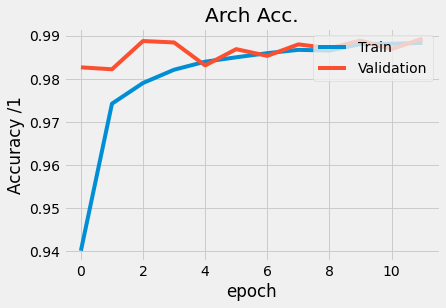

In [26]:
#check test data
arch.evaluate(testX,testY1h)[1]
#plot
pyplot.plot(hist.history['accuracy'])
pyplot.plot(hist.history['val_accuracy'])
pyplot.title('Arch Acc.')
pyplot.xlabel('epoch')
pyplot.ylabel('Accuracy /1')
pyplot.legend(['Train', 'Validation'], loc = 'upper right')
pyplot.show()

In [ ]:
#test a random image from online 
from google.colab import files 
uploaded = files.upload()

In [ ]:
#structure input
image = pyplot.imread('imagename.png')
from skimage.transform import resize
resized = resize(image,(28,28,1))
#predict
predictions = arch.predict(np.array([resized]))
best = 0
for i in range(10):
  if (predictions[0][i] > predictions[0][best]):
    best = i

print(best)